In [1]:
import numpy as np
import pandas as pd
import scipy as  sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("")

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df['workclass']=df['workclass'].replace('?',np.nan)

In [9]:
df['occupation']=df['occupation'].replace('?',np.nan)

In [10]:
df.isin(['?']).sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [11]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [12]:
df.dropna(how='any',inplace=True)

In [13]:
print(f"there are{df.duplicated().sum()} duplicated values")

there are48 duplicated values


In [14]:
df.shape

(46033, 15)

In [18]:
x=df.loc[:,['age','workclass','educational-num','occupation','gender','hours-per-week']]
y=df.loc[:,'income']

In [19]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y=pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [20]:
numeric_features=x.select_dtypes('number')
categorical_features=x.select_dtypes('object')


In [23]:
numeric_features

,age,educational-num,hours-per-week
0,25,7,40
1,38,9,50
2,28,12,40
3,44,10,40
5,34,6,30
...,...,...,...
48837,27,12,38
48838,40,9,40
48839,58,9,40
48840,22,9,20


In [21]:
categorical_features

,workclass,occupation,gender
0,Private,Machine-op-inspct,Male
1,Private,Farming-fishing,Male
2,Local-gov,Protective-serv,Male
3,Private,Machine-op-inspct,Male
4,?,?,Female
...,...,...,...
48837,Private,Tech-support,Female
48838,Private,Machine-op-inspct,Male
48839,Private,Adm-clerical,Female
48840,Private,Adm-clerical,Male


In [22]:
converted_categorical_features = pd.get_dummies(categorical_features)
converted_categorical_features = pd.get_dummies(categorical_features)
converted_categorical_features.shape
all_features=[converted_categorical_features,numeric_features]
newx =pd.concat(all_features,axis=1, join='inner')
newx.shape

(48842, 29)

In [23]:
newx.columns

Index(['workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'gender_Female', 'gender_Male', 'age',
       'educational-num', 'hours-per-week'],
      dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(newx,y,test_size=0.33,random_state=42)


In [26]:
from sklearn.tree import DecisionTreeClassifier
categorical_features = DecisionTreeClassifier(max_depth=5)
categorical_features.fit(x_train,y_train)
y_pred=categorical_features.predict(x_test)
y_test.shape
y_pred.shape

(16118,)

In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8105223973197667


Text(0.5, 1.0, 'Decision tree trained on the selected features')

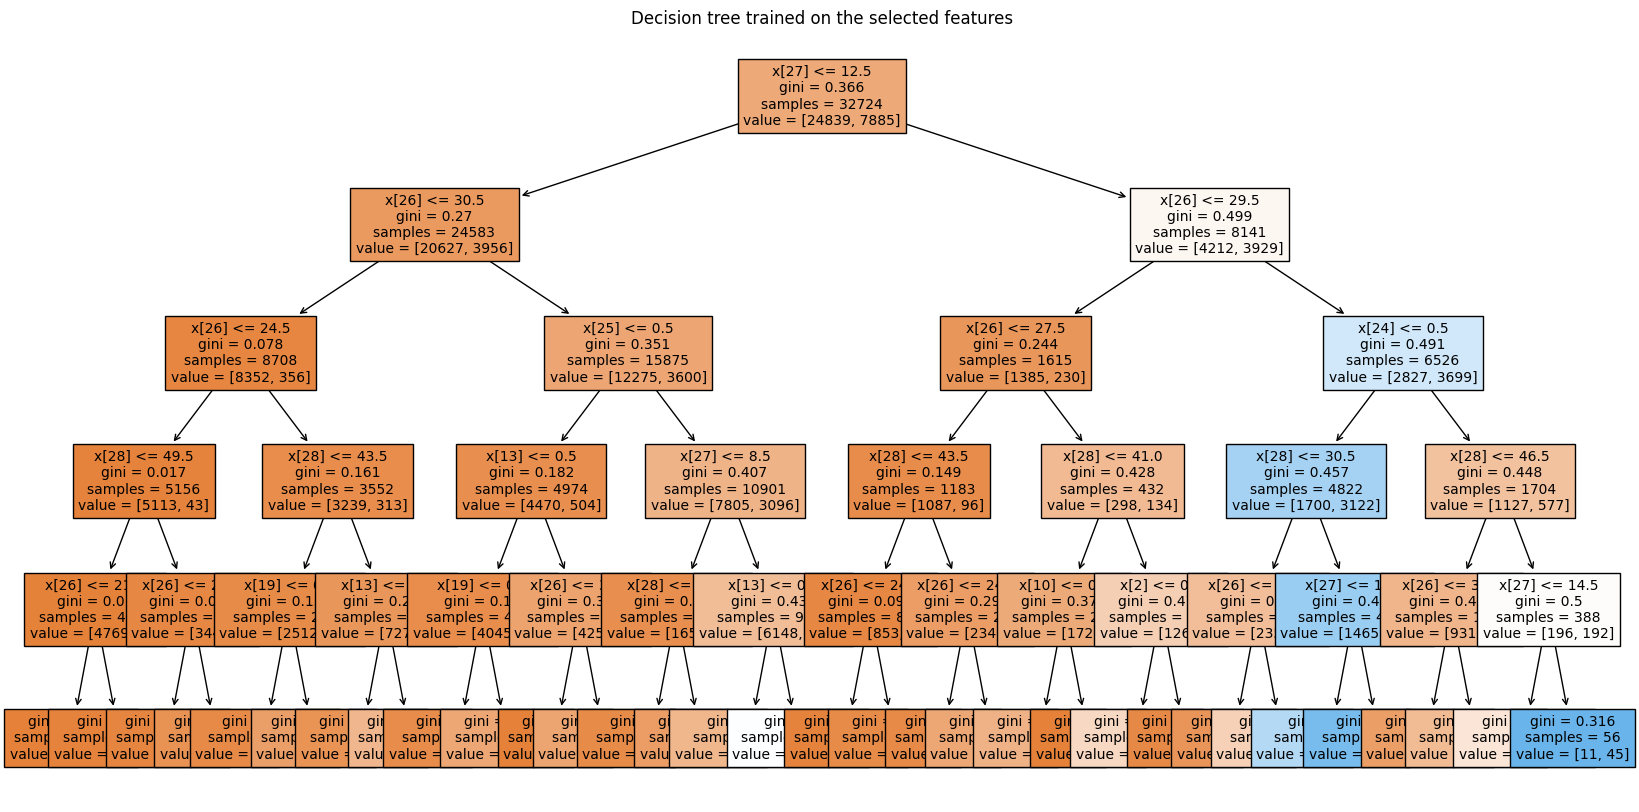

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plot_tree(categorical_features,fontsize=10,filled=True)
plt.title("Decision tree trained on the selected features")